In [1]:
!git clone https://github.com/Dibz15/OpenMineChangeDetection.git
import sys
sys.path.append('/content/OpenMineChangeDetection/')

Cloning into 'OpenMineChangeDetection'...
remote: Enumerating objects: 3564, done.
remote: Counting objects: 100% (163/163), done.
remote: Compressing objects: 100% (80/80), done.
remote: Total 3564 (delta 89), reused 156 (delta 82), pack-reused 3401
Receiving objects: 100% (3564/3564), 124.42 MiB | 17.40 MiB/s, done.
Resolving deltas: 100% (2313/2313), done.
Updating files: 100% (1702/1702), done.


In [2]:
!pip install rasterio==1.3.8
!pip install torchgeo==0.4.1
!pip install tiler==0.5.7
!pip install kornia==0.6.12
!pip install lightning==1.9.5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.5/292.5 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 653.4/653.4 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.2/535.2 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.1/549.1 kB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 31.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━

In [12]:
!apt install -y gdal-bin libgdal-dev
!pip install gdal

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libgdal-dev is already the newest version (3.6.4+dfsg-1~jammy0).
The following additional packages will be installed:
  python3-gdal python3-numpy
Suggested packages:
  libgdal-grass python-numpy-doc python3-pytest
The following NEW packages will be installed:
  gdal-bin python3-gdal python3-numpy
0 upgraded, 3 newly installed, 0 to remove and 39 not upgraded.
Need to get 5,055 kB of archives.
After this operation, 25.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 python3-numpy amd64 1:1.21.5-1ubuntu22.04.1 [3,467 kB]
Get:2 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy/main amd64 python3-gdal amd64 3.6.4+dfsg-1~jammy0 [1,027 kB]
Get:3 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy/main amd64 gdal-bin amd64 3.6.4+dfsg-1~jammy0 [561 kB]
Fetched 5,055 kB in 2s (2,506 kB/s)
Selecting previously unselected pa

In [2]:
from OpenMineChangeDetection.utils import download_prep_oms2cd, download_file
# download_prep_oms2cd(output_dir='OMS2CD')

In [9]:
def download_prep_zip(url, output_dir):
    import zipfile
    import os
    oms2cd_file = os.path.join(output_dir, 'tmp_01234.zip')

    if os.path.isdir(output_dir):
        print(f'Output directory {output_dir} already exists. Skipping dataset prep.')
        return

    os.makedirs(output_dir)
    download_file(url, oms2cd_file)

    print(f'Extracting archive into {output_dir}.')
    with zipfile.ZipFile(oms2cd_file, 'r') as zip_ref:
        zip_ref.extractall(output_dir)

    print(f'Removing .zip file.')
    try:
        os.remove(oms2cd_file)
    except:
        pass

    print(f'Done.')


In [5]:
download_prep_zip("https://drive.usercontent.google.com/download?id=1pndvMftPNYgAS9SX_CpJ9kJh9CWZfXjA&export=download&authuser=0&confirm=t&uuid=fc7874fa-94b8-40ba-a12f-c9f35bdfaf20&at=APZUnTW3f7YRPlJ4yew8C0uBOIp_%3A1711557428433",
                  '12band')

Extracting archive into 12band.
Removing .zip file.
Done.


In [6]:
download_prep_zip("https://drive.usercontent.google.com/download?id=1Kyle3U-lHQsj_zo7xO-GQJk_ZX9SmiKG&export=download&authuser=1&confirm=t&uuid=bd2805e6-3d2e-4ae9-a399-74654742448a&at=APZUnTX8msfWBes6cP7mRR_P04c3:1711558306554",
                  "OMS2CD")

Extracting archive into OMS2CD.
Removing .zip file.
Done.


In [7]:
!ls -l 12band | wc -l

351


In [8]:
import os
import shutil

# Paths to the directories
dir_a = 'OMS2CD'
dir_b = '12band'

OMS2CD_files = os.listdir(dir_a)

alt_file_map = {}

# Remove '_alt' from files, because the original 12band files don't reflect this
for i in range(len(OMS2CD_files)):
  if '_alt' in OMS2CD_files[i]:
    old_name = OMS2CD_files[i]
    new_name = OMS2CD_files[i].replace('_alt', '')
    alt_file_map[new_name] = old_name
    OMS2CD_files[i] = new_name
# Get a list of filenames in each directory
files_in_a = set(OMS2CD_files)
files_in_b = set(os.listdir(dir_b))

os.makedirs('12band_reduced')

for f in files_in_b:
  if f in files_in_a:
    file_path = os.path.join(dir_b, f)
    try:
      new_name = os.path.join('12band_reduced', alt_file_map.get(f, f))
      shutil.copyfile(file_path, new_name)
      print(f'Copied {file_path} to {new_name}')
    except OSError as e:
      print(f'Error copying {file_path}: {e}')



Copied 12band/s2_Artemyevsky_81.7826042963516_50.600017274045_2019-06-01.tif to 12band_reduced/s2_Artemyevsky_81.7826042963516_50.600017274045_2019-06-01.tif
Copied 12band/s2_Maules Creek_150.1189704360766_-30.55877474487686_2019-06-01.tif to 12band_reduced/s2_Maules Creek_150.1189704360766_-30.55877474487686_2019-06-01.tif
Copied 12band/s2_Moa_sotto_-74.96095939538486_20.58394314899455_2020-02-01.tif to 12band_reduced/s2_Moa_sotto_-74.96095939538486_20.58394314899455_2020-02-01.tif
Copied 12band/s2_Gunnedah_sugarloaf_150.11685310638242_-30.981028551012983_2020-08-01.tif to 12band_reduced/s2_Gunnedah_sugarloaf_150.11685310638242_-30.981028551012983_2020-08-01.tif
Copied 12band/s2_Olympic Dam_136.8546959572593_-30.43649652805288_2019-05-01.tif to 12band_reduced/s2_Olympic Dam_136.8546959572593_-30.43649652805288_2019-05-01.tif
Copied 12band/s2_Mianchi_111.628344391967_34.8216271574413_2019-06-01.tif to 12band_reduced/s2_Mianchi_111.628344391967_34.8216271574413_2019-06-01.tif
Copied 12b

In [9]:
!ls -l 12band | wc -l

351


In [10]:
!ls -l 12band_reduced | wc -l

103


In [11]:
!ls -l OMS2CD | wc -l

110


In [ ]:
# import pandas as pd

# df = pd.read_csv('OMS2CD/mapping.csv')

# file_paths_df = set(df['imageA'].tolist() + df['imageB'].tolist())

# # Get a set of all filenames present in directory B
# files_in_b = {os.path.basename(file) for file in os.listdir(dir_b)}

# # Check each file in the DataFrame against the files in directory B
# missing_files = [file for file in file_paths_df if os.path.basename(file) not in files_in_b]

# # Warn the user about missing files
# if missing_files:
#     print("Warning: The following files are listed in the DataFrame but missing from directory B:")
#     for file in missing_files:
#         print(file)
# else:
#     print("All files listed in the DataFrame are present in directory B.")

In [13]:
# Get a list of filenames in each directory
files_in_a = set(os.listdir('OMS2CD'))
files_in_b = set(os.listdir('12band_reduced'))

for f in files_in_a:
  if f not in files_in_b:
    print(f'{f} not in 12band_reduced')
    full_a = os.path.join('OMS2CD', f)
    full_b = os.path.join('12band_reduced', f)
    print(f'Copying {full_a} to {full_b}')
    if os.path.isdir(full_a):
      shutil.copytree(full_a, full_b)
    else:
      shutil.copy(full_a, full_b)

mapping.csv not in 12band_reduced
Copying OMS2CD/mapping.csv to 12band_reduced/mapping.csv
train.csv not in 12band_reduced
Copying OMS2CD/train.csv to 12band_reduced/train.csv
test.csv not in 12band_reduced
Copying OMS2CD/test.csv to 12band_reduced/test.csv
mask not in 12band_reduced
Copying OMS2CD/mask to 12band_reduced/mask
val.csv not in 12band_reduced
Copying OMS2CD/val.csv to 12band_reduced/val.csv
README.txt not in 12band_reduced
Copying OMS2CD/README.txt to 12band_reduced/README.txt
area_mask not in 12band_reduced
Copying OMS2CD/area_mask to 12band_reduced/area_mask


In [14]:
!du -h 12band

3.5G	12band


In [19]:
!du -h 12band_reduced

52M	12band_reduced/mask
47M	12band_reduced/area_mask
1.2G	12band_reduced


In [10]:
import rasterio
import matplotlib.pyplot as plt

def show_tiff_band(file_path, band):
  # Open the TIFF file
  with rasterio.open(file_path) as src:
      # Read the third channel
      third_channel = src.read(band)

      # Attempt to print the RowsPerStrip value
      # Note: Not all TIFF files will have this tag, hence using .get() with a default value
      print(src.meta)
      print(src.tags())

  # Plotting the third channel
  plt.imshow(third_channel, cmap='gray')
  plt.colorbar()
  plt.title('Third Channel of TIFF Image')
  plt.xlabel('X pixel')
  plt.ylabel('Y pixel')
  plt.show()


{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 647, 'height': 1006, 'count': 11, 'crs': CRS.from_epsg(32644), 'transform': Affine(10.0, 0.0, 552150.0,
       0.0, -10.0, 5610670.0)}
{'AREA_OR_POINT': 'Area'}


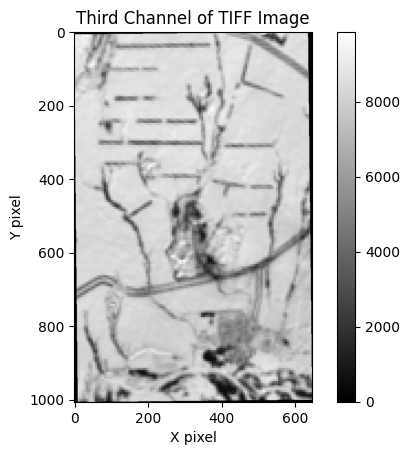

In [42]:
file_path = '/content/12band_reduced/s2_Artemyevsky_81.7826042963516_50.600017274045_2018-12-01.tif'
show_tiff_band(file_path, 1)

In [11]:
import os
import subprocess
from shutil import copy2

def set_rows_per_strip(file_path, new_file_path, rows_per_strip):
    print(f'Setting rows per strip on {new_file_path}')
    result = subprocess.run(['gdal_translate', '-co', f'TILED=YES', '-co', f'BLOCKYSIZE={rows_per_strip}', file_path, new_file_path])
    return result.returncode

def update_tiffs_in_directory(src_directory, dst_directory, rows_per_strip):
    if not os.path.exists(dst_directory):
        os.makedirs(dst_directory)

    for root, dirs, files in os.walk(src_directory):
        for dir in dirs:
            dst_dir = os.path.join(root.replace(src_directory, dst_directory), dir)
            os.makedirs(dst_dir, exist_ok=True)

        for file in files:
            old_file_path = os.path.join(root, file)
            new_file_path = os.path.join(root.replace(src_directory, dst_directory), file)

            if file.endswith('.tif'):
                set_rows_per_strip(old_file_path, new_file_path, rows_per_strip)

In [18]:

src_directory = '/content/12band_reduced'  # replace with your source directory path
dst_directory = '/content/12band_reduced'  # replace with your destination directory path
rows_per_strip = 256  # replace with desired number of rows per strip
update_tiffs_in_directory(src_directory, dst_directory, rows_per_strip)


In [12]:
import zipfile
import shutil

def compress_directory(source_dir, zip_file):
    # Create a zip archive of the directory
    with zipfile.ZipFile(zip_file, 'w', zipfile.ZIP_DEFLATED) as zipf:
        for root, dirs, files in os.walk(source_dir):
            for file_name in files:
                file_path = os.path.join(root, file_name)
                zipf.write(file_path, os.path.relpath(file_path, source_dir))

def copy_to_drive(source_path, drive_path):
    shutil.copyfile(source_path, os.path.join('/content/drive/MyDrive/', drive_path))

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
directory_to_compress = '/content/12band_reduced/'
zip_filename = '/content/OMS2CD_12band.zip'
compress_directory(directory_to_compress, zip_filename)
copy_to_drive(zip_filename, '2023_dissertation/dataset_archives/OMS2CD_12band.zip')

In [13]:
from tqdm import tqdm
import numpy as np
def export_rgbir_bands(source_dir, output_dir, source_bands='all'):
    assert source_bands in ['all', 'rgbir']
    if not os.path.exists(output_dir):
        print(f'Creating directory {output_dir}.')
        os.makedirs(output_dir)

    if source_bands == 'all':
        band_idx = [4, 3, 2, 8]
    else:
        band_idx = [3, 2, 1, 4]
    # Iterate over the files in the input directory
    for filename in tqdm(os.listdir(source_dir)):
        if filename.endswith('.tif'):
            with rasterio.open(os.path.join(source_dir, filename)) as src:
                rgb = src.read(band_idx)

                rgb = np.interp(rgb, (0, 10000), (0, 255)).astype(np.uint8)

                meta = src.meta
                meta.update(count=4, dtype=rasterio.uint8)

                with rasterio.open(os.path.join(output_dir, filename), 'w', **meta) as dst:
                    print(f'Writing {filename} RGB-NIR channels to {output_dir}.')
                    dst.write(rgb)

In [14]:
export_rgbir_bands('12band_reduced', 'OMS2CD_rgbnir', source_bands='all')

Creating directory OMS2CD_rgbnir.


  0%|          | 0/109 [00:00<?, ?it/s]

Writing s2_Pingguo_Burong_107.45911210248553_23.436000566583864_2020-07-01.tif RGB-NIR channels to OMS2CD_rgbnir.


  4%|▎         | 4/109 [00:00<00:12,  8.35it/s]

Writing s2_Guizhou_Xiuwen_106.62430578887023_26.78665816391409_2019-04-01.tif RGB-NIR channels to OMS2CD_rgbnir.
Writing s2_Narrabri_149.89886856651822_-30.518201859142547_2019-05-01.tif RGB-NIR channels to OMS2CD_rgbnir.
Writing s2_Narrabri_149.89886856651822_-30.518201859142547_2019-12-01.tif RGB-NIR channels to OMS2CD_rgbnir.


  5%|▍         | 5/109 [00:00<00:20,  5.20it/s]

Writing s2_Artemyevsky_81.7826042963516_50.600017274045_2020-02-01.tif RGB-NIR channels to OMS2CD_rgbnir.


  6%|▌         | 6/109 [00:01<00:29,  3.53it/s]

Writing s2_Werris Creek_150.633355555961_-31.3853783732025_2019-03-01.tif RGB-NIR channels to OMS2CD_rgbnir.


  6%|▋         | 7/109 [00:01<00:26,  3.87it/s]

Writing s2_Gunnedah_vickery_150.27155437222632_-30.761526187954605_2019-03-01.tif RGB-NIR channels to OMS2CD_rgbnir.


  7%|▋         | 8/109 [00:02<00:33,  3.05it/s]

Writing s2_Maules Creek_150.1189704360766_-30.55877474487686_2019-06-01.tif RGB-NIR channels to OMS2CD_rgbnir.


 10%|█         | 11/109 [00:02<00:24,  4.03it/s]

Writing s2_Moa_sotto_-74.96095939538486_20.58394314899455_2019-03-01.tif RGB-NIR channels to OMS2CD_rgbnir.
Writing s2_Narrabri_149.89886856651822_-30.518201859142547_2020-04-01.tif RGB-NIR channels to OMS2CD_rgbnir.
Writing s2_Pingguo_Anren_107.44572668596695_23.465217482264094_2020-11-01.tif RGB-NIR channels to OMS2CD_rgbnir.


 11%|█         | 12/109 [00:03<00:25,  3.76it/s]

Writing s2_Artemyevsky_81.7826042963516_50.600017274045_2019-06-01.tif RGB-NIR channels to OMS2CD_rgbnir.


 13%|█▎        | 14/109 [00:03<00:23,  4.00it/s]

Writing s2_Werris Creek_150.633355555961_-31.3853783732025_2019-11-01.tif RGB-NIR channels to OMS2CD_rgbnir.
Writing s2_Guizhou_Xiuwen_106.62430578887023_26.78665816391409_2019-12-01.tif RGB-NIR channels to OMS2CD_rgbnir.
Writing s2_Narrabri_149.89886856651822_-30.518201859142547_2019-06-01.tif RGB-NIR channels to OMS2CD_rgbnir.


 15%|█▍        | 16/109 [00:03<00:18,  4.89it/s]

Writing s2_Artemyevsky_81.7826042963516_50.600017274045_2020-03-01.tif RGB-NIR channels to OMS2CD_rgbnir.


 17%|█▋        | 18/109 [00:04<00:19,  4.66it/s]

Writing s2_Werris Creek_150.633355555961_-31.3853783732025_2020-04-01.tif RGB-NIR channels to OMS2CD_rgbnir.
Writing s2_Gunnedah_vickery_150.27155437222632_-30.761526187954605_2019-01-01.tif RGB-NIR channels to OMS2CD_rgbnir.
Writing s2_Gunnedah_sugarloaf_150.11685310638242_-30.981028551012983_2020-08-01.tif RGB-NIR channels to OMS2CD_rgbnir.


 18%|█▊        | 20/109 [00:04<00:17,  5.19it/s]

Writing s2_Artemyevsky_81.7826042963516_50.600017274045_2020-07-01.tif RGB-NIR channels to OMS2CD_rgbnir.


 19%|█▉        | 21/109 [00:05<00:19,  4.45it/s]

Writing s2_Maules Creek_150.1189704360766_-30.55877474487686_2020-10-01.tif RGB-NIR channels to OMS2CD_rgbnir.


 21%|██        | 23/109 [00:05<00:16,  5.35it/s]

Writing s2_Artemyevsky_81.7826042963516_50.600017274045_2020-12-01.tif RGB-NIR channels to OMS2CD_rgbnir.


 22%|██▏       | 24/109 [00:05<00:19,  4.40it/s]

Writing s2_Moa_sotto_-74.96095939538486_20.58394314899455_2019-12-01.tif RGB-NIR channels to OMS2CD_rgbnir.


 23%|██▎       | 25/109 [00:06<00:23,  3.52it/s]

Writing s2_Moa_sotto_-74.96095939538486_20.58394314899455_2020-04-01.tif RGB-NIR channels to OMS2CD_rgbnir.
Writing s2_Narrabri_149.89886856651822_-30.518201859142547_2020-03-01.tif RGB-NIR channels to OMS2CD_rgbnir.


 25%|██▍       | 27/109 [00:06<00:19,  4.21it/s]

Writing s2_Narrabri_149.89886856651822_-30.518201859142547_2019-07-01.tif RGB-NIR channels to OMS2CD_rgbnir.


 27%|██▋       | 29/109 [00:06<00:18,  4.32it/s]

Writing s2_Gunnedah_vickery_150.27155437222632_-30.761526187954605_2020-11-01.tif RGB-NIR channels to OMS2CD_rgbnir.


 28%|██▊       | 30/109 [00:08<00:34,  2.26it/s]

Writing s2_Artemyevsky_81.7826042963516_50.600017274045_2019-05-01.tif RGB-NIR channels to OMS2CD_rgbnir.


 28%|██▊       | 31/109 [00:09<00:51,  1.50it/s]

Writing s2_Maules Creek_alt_150.1189704360766_-30.55877474487686_2019-10-01.tif RGB-NIR channels to OMS2CD_rgbnir.


 29%|██▉       | 32/109 [00:10<00:53,  1.44it/s]

Writing s2_Guizhou_Xiuwen_106.62430578887023_26.78665816391409_2019-10-01.tif RGB-NIR channels to OMS2CD_rgbnir.


 30%|███       | 33/109 [00:11<01:07,  1.12it/s]

Writing s2_Artemyevsky_81.7826042963516_50.600017274045_2019-07-01.tif RGB-NIR channels to OMS2CD_rgbnir.


 31%|███       | 34/109 [00:13<01:16,  1.01s/it]

Writing s2_Mianchi_111.628344391967_34.8216271574413_2019-07-01.tif RGB-NIR channels to OMS2CD_rgbnir.


 32%|███▏      | 35/109 [00:14<01:20,  1.08s/it]

Writing s2_Artemyevsky_81.7826042963516_50.600017274045_2019-04-01.tif RGB-NIR channels to OMS2CD_rgbnir.


 34%|███▍      | 37/109 [00:16<01:18,  1.09s/it]

Writing s2_Artemyevsky_81.7826042963516_50.600017274045_2019-01-01.tif RGB-NIR channels to OMS2CD_rgbnir.


 35%|███▍      | 38/109 [00:17<01:18,  1.10s/it]

Writing s2_Artemyevsky_81.7826042963516_50.600017274045_2018-12-01.tif RGB-NIR channels to OMS2CD_rgbnir.


 36%|███▌      | 39/109 [00:19<01:22,  1.18s/it]

Writing s2_Artemyevsky_81.7826042963516_50.600017274045_2020-06-01.tif RGB-NIR channels to OMS2CD_rgbnir.


 37%|███▋      | 40/109 [00:19<01:06,  1.04it/s]

Writing s2_Artemyevsky_81.7826042963516_50.600017274045_2020-04-01.tif RGB-NIR channels to OMS2CD_rgbnir.


 38%|███▊      | 41/109 [00:19<00:55,  1.23it/s]

Writing s2_Mianchi_111.628344391967_34.8216271574413_2019-04-01.tif RGB-NIR channels to OMS2CD_rgbnir.


 39%|███▊      | 42/109 [00:20<00:43,  1.54it/s]

Writing s2_Gunnedah_vickery_150.27155437222632_-30.761526187954605_2019-06-01.tif RGB-NIR channels to OMS2CD_rgbnir.


 39%|███▉      | 43/109 [00:20<00:42,  1.56it/s]

Writing s2_Olympic Dam_136.8546959572593_-30.43649652805288_2019-12-01.tif RGB-NIR channels to OMS2CD_rgbnir.


 41%|████▏     | 45/109 [00:21<00:27,  2.32it/s]

Writing s2_Werris Creek_150.633355555961_-31.3853783732025_2020-03-01.tif RGB-NIR channels to OMS2CD_rgbnir.
Writing s2_Gunnedah_vickery_150.27155437222632_-30.761526187954605_2020-02-01.tif RGB-NIR channels to OMS2CD_rgbnir.


 42%|████▏     | 46/109 [00:21<00:24,  2.53it/s]

Writing s2_Gunnedah_leard_150.17770055678767_-30.62245095758179_2019-04-01.tif RGB-NIR channels to OMS2CD_rgbnir.


 43%|████▎     | 47/109 [00:21<00:22,  2.72it/s]

Writing s2_Werris Creek_150.633355555961_-31.3853783732025_2019-08-01.tif RGB-NIR channels to OMS2CD_rgbnir.


 44%|████▍     | 48/109 [00:22<00:22,  2.72it/s]

Writing s2_Moa_sotto_-74.96095939538486_20.58394314899455_2019-11-01.tif RGB-NIR channels to OMS2CD_rgbnir.
Writing s2_Narrabri_149.89886856651822_-30.518201859142547_2019-04-01.tif RGB-NIR channels to OMS2CD_rgbnir.


 49%|████▊     | 53/109 [00:22<00:08,  6.41it/s]

Writing s2_Moa_gorda_-74.87559263998233_20.608891954354334_2020-03-01.tif RGB-NIR channels to OMS2CD_rgbnir.
Writing s2_Gunnedah_sugarloaf_150.11685310638242_-30.981028551012983_2019-05-01.tif RGB-NIR channels to OMS2CD_rgbnir.
Writing s2_Narrabri_149.89886856651822_-30.518201859142547_2019-11-01.tif RGB-NIR channels to OMS2CD_rgbnir.


 51%|█████▏    | 56/109 [00:23<00:07,  6.87it/s]

Writing s2_Gunnedah_leard_150.17770055678767_-30.62245095758179_2019-05-01.tif RGB-NIR channels to OMS2CD_rgbnir.
Writing s2_Narrabri_149.89886856651822_-30.518201859142547_2020-06-01.tif RGB-NIR channels to OMS2CD_rgbnir.
Writing s2_Gunnedah_sugarloaf_150.11685310638242_-30.981028551012983_2020-09-01.tif RGB-NIR channels to OMS2CD_rgbnir.


 53%|█████▎    | 58/109 [00:23<00:08,  5.81it/s]

Writing s2_Maules Creek_150.1189704360766_-30.55877474487686_2019-05-01.tif RGB-NIR channels to OMS2CD_rgbnir.
Writing s2_Moa_gorda_-74.87559263998233_20.608891954354334_2020-06-01.tif RGB-NIR channels to OMS2CD_rgbnir.


 55%|█████▌    | 60/109 [00:23<00:06,  7.41it/s]

Writing s2_Guizhou_Xiuwen_106.62430578887023_26.78665816391409_2020-04-01.tif RGB-NIR channels to OMS2CD_rgbnir.


 56%|█████▌    | 61/109 [00:23<00:08,  5.93it/s]

Writing s2_Mianchi_111.628344391967_34.8216271574413_2019-05-01.tif RGB-NIR channels to OMS2CD_rgbnir.
Writing s2_Pingguo_Burong_107.45911210248553_23.436000566583864_2020-10-01.tif RGB-NIR channels to OMS2CD_rgbnir.


 58%|█████▊    | 63/109 [00:24<00:09,  4.79it/s]

Writing s2_Olympic Dam_136.8546959572593_-30.43649652805288_2019-04-01.tif RGB-NIR channels to OMS2CD_rgbnir.


 60%|█████▉    | 65/109 [00:24<00:09,  4.74it/s]

Writing s2_Mianchi_111.628344391967_34.8216271574413_2020-02-01.tif RGB-NIR channels to OMS2CD_rgbnir.
Writing s2_Gunnedah_vickery_150.27155437222632_-30.761526187954605_2019-04-01.tif RGB-NIR channels to OMS2CD_rgbnir.


 61%|██████    | 66/109 [00:25<00:09,  4.51it/s]

Writing s2_Artemyevsky_81.7826042963516_50.600017274045_2019-02-01.tif RGB-NIR channels to OMS2CD_rgbnir.
Writing s2_Narrabri_149.89886856651822_-30.518201859142547_2019-08-01.tif RGB-NIR channels to OMS2CD_rgbnir.


 62%|██████▏   | 68/109 [00:25<00:07,  5.16it/s]

Writing s2_Artemyevsky_81.7826042963516_50.600017274045_2020-01-01.tif RGB-NIR channels to OMS2CD_rgbnir.


 63%|██████▎   | 69/109 [00:25<00:08,  4.47it/s]

Writing s2_Maules Creek_150.1189704360766_-30.55877474487686_2020-09-01.tif RGB-NIR channels to OMS2CD_rgbnir.


 66%|██████▌   | 72/109 [00:26<00:06,  5.68it/s]

Writing s2_Artemyevsky_81.7826042963516_50.600017274045_2020-10-01.tif RGB-NIR channels to OMS2CD_rgbnir.
Writing s2_Gunnedah_vickery_150.27155437222632_-30.761526187954605_2019-05-01.tif RGB-NIR channels to OMS2CD_rgbnir.


 67%|██████▋   | 73/109 [00:26<00:08,  4.46it/s]

Writing s2_Moa_sotto_-74.96095939538486_20.58394314899455_2020-02-01.tif RGB-NIR channels to OMS2CD_rgbnir.


 68%|██████▊   | 74/109 [00:26<00:08,  4.01it/s]

Writing s2_Artemyevsky_81.7826042963516_50.600017274045_2019-11-01.tif RGB-NIR channels to OMS2CD_rgbnir.


 70%|██████▉   | 76/109 [00:27<00:08,  3.82it/s]

Writing s2_Moa_sotto_-74.96095939538486_20.58394314899455_2019-01-01.tif RGB-NIR channels to OMS2CD_rgbnir.
Writing s2_Gunnedah_sugarloaf_150.11685310638242_-30.981028551012983_2019-12-01.tif RGB-NIR channels to OMS2CD_rgbnir.


 71%|███████   | 77/109 [00:27<00:09,  3.20it/s]

Writing s2_Werris Creek_150.633355555961_-31.3853783732025_2019-07-01.tif RGB-NIR channels to OMS2CD_rgbnir.


 72%|███████▏  | 78/109 [00:28<00:10,  2.85it/s]

Writing s2_Mianchi_111.628344391967_34.8216271574413_2019-03-01.tif RGB-NIR channels to OMS2CD_rgbnir.


 72%|███████▏  | 79/109 [00:28<00:10,  2.92it/s]

Writing s2_Artemyevsky_81.7826042963516_50.600017274045_2020-05-01.tif RGB-NIR channels to OMS2CD_rgbnir.
Writing s2_Pingguo_Burong_107.45911210248553_23.436000566583864_2020-12-01.tif RGB-NIR channels to OMS2CD_rgbnir.


 75%|███████▌  | 82/109 [00:29<00:06,  4.10it/s]

Writing s2_Mianchi_111.628344391967_34.8216271574413_2020-04-01.tif RGB-NIR channels to OMS2CD_rgbnir.
Writing s2_Pingguo_Anren_107.44572668596695_23.465217482264094_2020-12-01.tif RGB-NIR channels to OMS2CD_rgbnir.


 77%|███████▋  | 84/109 [00:30<00:07,  3.41it/s]

Writing s2_Olympic Dam_136.8546959572593_-30.43649652805288_2019-05-01.tif RGB-NIR channels to OMS2CD_rgbnir.
Writing s2_Narrabri_149.89886856651822_-30.518201859142547_2019-09-01.tif RGB-NIR channels to OMS2CD_rgbnir.


 79%|███████▉  | 86/109 [00:30<00:06,  3.53it/s]

Writing s2_Maules Creek_150.1189704360766_-30.55877474487686_2019-11-01.tif RGB-NIR channels to OMS2CD_rgbnir.
Writing s2_Narrabri_149.89886856651822_-30.518201859142547_2020-02-01.tif RGB-NIR channels to OMS2CD_rgbnir.


 82%|████████▏ | 89/109 [00:31<00:04,  4.39it/s]

Writing s2_Gunnedah_leard_150.17770055678767_-30.62245095758179_2019-06-01.tif RGB-NIR channels to OMS2CD_rgbnir.
Writing s2_Narrabri_149.89886856651822_-30.518201859142547_2020-01-01.tif RGB-NIR channels to OMS2CD_rgbnir.


 83%|████████▎ | 90/109 [00:31<00:04,  4.10it/s]

Writing s2_Artemyevsky_81.7826042963516_50.600017274045_2020-08-01.tif RGB-NIR channels to OMS2CD_rgbnir.


 83%|████████▎ | 91/109 [00:31<00:04,  4.12it/s]

Writing s2_Artemyevsky_81.7826042963516_50.600017274045_2019-08-01.tif RGB-NIR channels to OMS2CD_rgbnir.


 84%|████████▍ | 92/109 [00:31<00:04,  3.90it/s]

Writing s2_Mianchi_111.628344391967_34.8216271574413_2019-06-01.tif RGB-NIR channels to OMS2CD_rgbnir.


 85%|████████▌ | 93/109 [00:32<00:04,  3.71it/s]

Writing s2_Werris Creek_150.633355555961_-31.3853783732025_2019-12-01.tif RGB-NIR channels to OMS2CD_rgbnir.


 87%|████████▋ | 95/109 [00:32<00:03,  4.14it/s]

Writing s2_Werris Creek_150.633355555961_-31.3853783732025_2019-04-01.tif RGB-NIR channels to OMS2CD_rgbnir.
Writing s2_Gunnedah_vickery_150.27155437222632_-30.761526187954605_2019-02-01.tif RGB-NIR channels to OMS2CD_rgbnir.


 88%|████████▊ | 96/109 [00:32<00:03,  3.85it/s]

Writing s2_Maules Creek_150.1189704360766_-30.55877474487686_2019-12-01.tif RGB-NIR channels to OMS2CD_rgbnir.


 89%|████████▉ | 97/109 [00:33<00:03,  3.15it/s]

Writing s2_Olympic Dam_136.8546959572593_-30.43649652805288_2020-01-01.tif RGB-NIR channels to OMS2CD_rgbnir.


 90%|████████▉ | 98/109 [00:33<00:03,  3.07it/s]

Writing s2_Artemyevsky_81.7826042963516_50.600017274045_2020-09-01.tif RGB-NIR channels to OMS2CD_rgbnir.
Writing s2_Gunnedah_sugarloaf_150.11685310638242_-30.981028551012983_2020-02-01.tif RGB-NIR channels to OMS2CD_rgbnir.


 92%|█████████▏| 100/109 [00:33<00:02,  4.35it/s]

Writing s2_Gunnedah_vickery_150.27155437222632_-30.761526187954605_2020-03-01.tif RGB-NIR channels to OMS2CD_rgbnir.


 93%|█████████▎| 101/109 [00:34<00:01,  4.35it/s]

Writing s2_Artemyevsky_81.7826042963516_50.600017274045_2019-10-01.tif RGB-NIR channels to OMS2CD_rgbnir.
Writing s2_Narrabri_149.89886856651822_-30.518201859142547_2020-05-01.tif RGB-NIR channels to OMS2CD_rgbnir.


 94%|█████████▍| 103/109 [00:34<00:01,  5.09it/s]

Writing s2_Artemyevsky_81.7826042963516_50.600017274045_2019-03-01.tif RGB-NIR channels to OMS2CD_rgbnir.


 95%|█████████▌| 104/109 [00:34<00:01,  4.39it/s]

Writing s2_Maules Creek_150.1189704360766_-30.55877474487686_2019-04-01.tif RGB-NIR channels to OMS2CD_rgbnir.
Writing s2_Moa_gorda_-74.87559263998233_20.608891954354334_2019-09-01.tif RGB-NIR channels to OMS2CD_rgbnir.


 98%|█████████▊| 107/109 [00:35<00:00,  5.96it/s]

Writing s2_Pingguo_Burong_107.45911210248553_23.436000566583864_2020-11-01.tif RGB-NIR channels to OMS2CD_rgbnir.
Writing s2_Gunnedah_sugarloaf_150.11685310638242_-30.981028551012983_2020-07-01.tif RGB-NIR channels to OMS2CD_rgbnir.


 99%|█████████▉| 108/109 [00:35<00:00,  6.18it/s]

Writing s2_Gunnedah_vickery_150.27155437222632_-30.761526187954605_2020-12-01.tif RGB-NIR channels to OMS2CD_rgbnir.


100%|██████████| 109/109 [00:35<00:00,  3.05it/s]

Writing s2_Maules Creek_alt_150.1189704360766_-30.55877474487686_2019-03-01.tif RGB-NIR channels to OMS2CD_rgbnir.


In [15]:
# Get a list of filenames in each directory
files_in_a = set(os.listdir('12band_reduced'))
files_in_b = set(os.listdir('OMS2CD_rgbnir'))

for f in files_in_a:
  if f not in files_in_b:
    print(f'{f} not in OMS2CD_rgbnir')
    full_a = os.path.join('12band_reduced', f)
    full_b = os.path.join('OMS2CD_rgbnir', f)
    print(f'Copying {full_a} to {full_b}')
    if os.path.isdir(full_a):
      shutil.copytree(full_a, full_b)
    else:
      shutil.copy(full_a, full_b)

train.csv not in OMS2CD_rgbnir
Copying 12band_reduced/train.csv to OMS2CD_rgbnir/train.csv
mapping.csv not in OMS2CD_rgbnir
Copying 12band_reduced/mapping.csv to OMS2CD_rgbnir/mapping.csv
README.txt not in OMS2CD_rgbnir
Copying 12band_reduced/README.txt to OMS2CD_rgbnir/README.txt
mask not in OMS2CD_rgbnir
Copying 12band_reduced/mask to OMS2CD_rgbnir/mask
val.csv not in OMS2CD_rgbnir
Copying 12band_reduced/val.csv to OMS2CD_rgbnir/val.csv
test.csv not in OMS2CD_rgbnir
Copying 12band_reduced/test.csv to OMS2CD_rgbnir/test.csv
area_mask not in OMS2CD_rgbnir
Copying 12band_reduced/area_mask to OMS2CD_rgbnir/area_mask


In [16]:
!du -h OMS2CD_rgbnir

52M	OMS2CD_rgbnir/mask
47M	OMS2CD_rgbnir/area_mask
330M	OMS2CD_rgbnir


In [19]:
directory_to_compress = '/content/OMS2CD_rgbnir/'
zip_filename = '/content/OMS2CD_rgbnir.zip'
compress_directory(directory_to_compress, zip_filename)
copy_to_drive(zip_filename, '2023_dissertation/dataset_archives/OMS2CD_rgbnir.zip')

{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 1330, 'height': 1000, 'count': 4, 'crs': CRS.from_epsg(32753), 'transform': Affine(10.0, 0.0, 671460.0,
       0.0, -10.0, 6636380.0)}
{'AREA_OR_POINT': 'Area'}


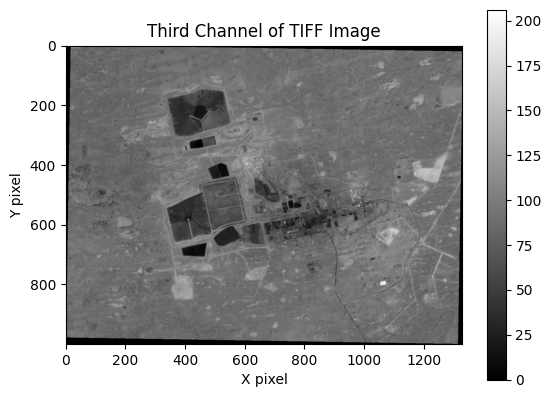

In [20]:
file_path = '/content/OMS2CD_rgbnir/s2_Olympic Dam_136.8546959572593_-30.43649652805288_2020-01-01.tif'
show_tiff_band(file_path, 4)

In [2]:
from OpenMineChangeDetection.datasets import OMS2CD

# Calculate the Mean/var of the RGB/NIR version of the dataset
OMS2CD.CalcMeanVar('12band_reduced', split='train', bands='all')

(tensor([7476.4429, 7541.8765, 7298.9458, 7608.5132, 7783.0039, 7646.7476,
         7455.5493, 7909.8477, 7355.8169,  987.4725, 1077.0780]),
 tensor([1796.4598, 2179.1035, 2135.9128, 2232.3074, 2172.5774, 2054.2542,
         1965.7772, 2143.4385, 1642.2606,  270.6682,  288.4058]))

In [5]:
OMS2CD.CalcMeanVar('OMS2CD', split='train', bands='rgb')

(tensor([192.9281, 185.3099, 191.5535]), tensor([55.8543, 53.8187, 55.0701]))

In [3]:
OMS2CD.CalcMeanVar('OMS2CD_rgbnir', split='train', bands='rgbnir')

(tensor([192.9281, 185.3099, 191.5535, 200.3148]),
 tensor([55.8543, 53.8187, 55.0701, 53.1153]))

In [5]:
!sha256sum OMS2CD_12band.zip

b8e92aa1265882ea888f95d3f24fadfe1ab804ac907e1e8c2ad9e3595eb045bd  OMS2CD_12band.zip


In [6]:
!sha256sum OMS2CD_rgbnir.zip

0bc64f25766b6823b8b113505b991e36add944ffc0b5a4795922173c0e63a49e  OMS2CD_rgbnir.zip
